<a href="https://colab.research.google.com/github/Neeraj6maths/Playstore-apps-EDA/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [ ]:
appdata_path = "/content/drive/MyDrive/AlmaBetter/capstone projects/EDA/Play store apps Analysis/Copy of Play Store Data.csv"
user_reviews_path = "/content/drive/MyDrive/AlmaBetter/capstone projects/EDA/Play store apps Analysis/Copy of User Reviews.csv"

app_data = pd.read_csv(appdata_path)
user_reviews = pd.read_csv(user_reviews_path)

### Taking look at both dataframes

In [ ]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Understanding columns of dataframes

#### <u>App Data Columns</u>

In [ ]:
app_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
app_data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

An outlier is present in Rating 19.

In [ ]:
app_data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
app_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
len(app_data['Genres'].unique())

120

In [ ]:
app_data['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
1.3.21                   1
v8.0.1.8.0629.1          1
9.7.0                    1
5.42.1                   1
1.0.1.24                 1
Name: Current Ver, Length: 2832, dtype: int64

### Cleaning and Preprocessing dataframes

####(1) Removing duplicates rows if any

In [ ]:
app_data = app_data[~app_data.duplicated()]
user_reviews = user_reviews[~user_reviews.duplicated()]

In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


####(2) Dropping duplicate rows having different review num in app_data dataframe.

In [ ]:
app_data[app_data['App'] == "ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


We see here that for each app there are multiple rows with only difference in Reviews columns, so we will keep the last row with only updated reiews number and will delete all the above rows of same app and category.

In [ ]:
app_data_review_less = app_data.drop(['Reviews'], axis = 1)
app_data_review_less[app_data_review_less.duplicated()]

,App,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,35M,"100,000,000+",Free,0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
294,Slack,BUSINESS,4.4,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
383,imo free video calls and chat,COMMUNICATION,4.3,11M,"500,000,000+",Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,Varies with device,"100,000,000+",Free,0,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device
10715,FarmersOnly Dating,DATING,3.0,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up


These are duplicate rows having only difference in Reviews

In [ ]:
col_list = list(app_data.columns)
col_list.remove('Reviews')
app_data_1 = app_data.sort_values('Reviews')
app_data_1 = app_data_1.drop_duplicates(subset = col_list, keep = 'last' )
app_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 8076 to 2989
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9783 non-null   object 
 1   Category        9783 non-null   object 
 2   Rating          8318 non-null   float64
 3   Reviews         9783 non-null   object 
 4   Size            9783 non-null   object 
 5   Installs        9783 non-null   object 
 6   Type            9782 non-null   object 
 7   Price           9783 non-null   object 
 8   Content Rating  9782 non-null   object 
 9   Genres          9783 non-null   object 
 10  Last Updated    9783 non-null   object 
 11  Current Ver     9775 non-null   object 
 12  Android Ver     9780 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


####(3) Removing outliers

In [ ]:
app_data_1.describe()

,Rating
count,8318.000000
mean,4.177422
std,0.558106
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


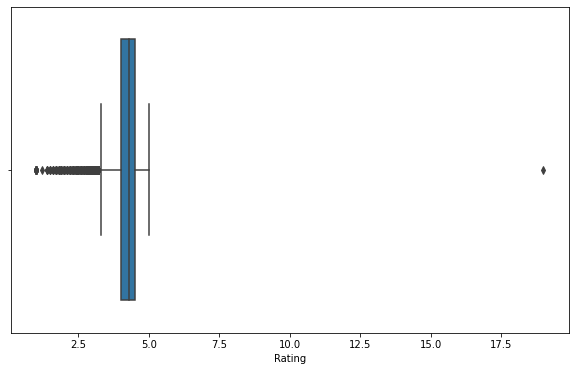

In [ ]:
plt.figure(figsize = (10,6))
sbn.boxplot(app_data_1['Rating'])
plt.show()

We noticed that only Rating has numeric data in all rows and also Rating varied from 1 to 5. But max value of rating is 19. We will find that row for which rating is 19

In [ ]:
outlier_row = app_data_1[app_data_1['Rating'] == 19]
outlier_row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We see that Category value is missing and each value should shift 1 column right.

In [ ]:
outlier_row.iloc[:,1:] = outlier_row.iloc[:,1:].shift(periods = 1, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
app_data_1[app_data_1['Rating'] == 19] = outlier_row
app_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 8076 to 2989
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             9783 non-null   object
 1   Category        9782 non-null   object
 2   Rating          8318 non-null   object
 3   Reviews         9783 non-null   object
 4   Size            9783 non-null   object
 5   Installs        9783 non-null   object
 6   Type            9782 non-null   object
 7   Price           9783 non-null   object
 8   Content Rating  9783 non-null   object
 9   Genres          9782 non-null   object
 10  Last Updated    9783 non-null   object
 11  Current Ver     9775 non-null   object
 12  Android Ver     9781 non-null   object
dtypes: object(13)
memory usage: 1.0+ MB


All rows are of object type.

####(4) Converting Columns to appropriate data types

First converting price to float values by removing '$' sign

In [ ]:
app_data_1['Price'].unique()

array(['0', '$5.99', '$109.99', '$154.99', '$14.99', '$2.99', '$0.99',
       '$1.49', '$3.99', '$2.49', '$30.99', '$1.99', '$200.00', '$1.96',
       '$3.61', '$8.99', '$399.99', '$394.99', '$13.99', '$5.49',
       '$28.99', '$6.49', '$19.99', '$1.04', '$2.00', '$39.99', '$25.99',
       '$4.99', '$29.99', '$3.04', '$3.49', '$4.85', '$74.99', '$12.99',
       '$3.88', '$15.99', '$7.99', '$9.99', '$9.00', '$4.60', '$16.99',
       '$6.99', '$8.49', '$1.61', '$37.99', '$4.49', '$4.84', '$2.59',
       '$1.20', '$3.28', '$1.00', '$11.99', '$10.99', '$3.95', '$24.99',
       '$14.00', '$10.00', '$2.50', '$3.90', '$1.76', '$46.99', '$33.99',
       '$389.99', '$4.59', '$400.00', '$17.99', '$4.77', '$2.60', '$4.80',
       '$19.90', '$1.26', '$7.49', '$1.97', '$2.95', '$15.46', '$2.56',
       '$379.99', '$299.99', '$18.99', '$3.08', '$1.75', '$5.00',
       '$19.40', '$2.90', '$1.70', '$3.02', '$89.99', '$1.59', '$1.29',
       '$1.50', '$4.29', '$79.99'], dtype=object)

In [ ]:
def convert_to_num(x):
  if '$' in x:
    x = x[1:]
  return float(x)


app_data_1['Price'] = app_data_1['Price'].apply(lambda x : convert_to_num(x))
app_data_1['Price'].dtype

dtype('float64')

Changing Installs columns to float value showing atleast downloads

In [ ]:
app_data_1['Installs'].unique()

array(['50+', '10+', '5+', '100+', '1+', '1,000+', '500+', '0+', '5,000+',
       '10,000+', '100,000+', '50,000+', '0', '1,000,000+', '5,000,000+',
       '10,000,000+', '100,000,000+', '50,000,000+', '500,000+',
       '500,000,000+', '1,000,000,000+'], dtype=object)

In [ ]:
app_data_1.rename(columns = {'Installs' : 'Installs(+)'}, inplace = True)

def convert_install_num(x):
  if '+' in x:
    x = x[:-1]
  x = x.replace(',','')
  return float(x)

app_data_1['Installs(+)'] = app_data_1['Installs(+)'].apply(lambda x: convert_install_num(x))
app_data_1

,App,Category,Rating,Reviews,Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8076,CX Elevated,BUSINESS,NaN,0,55M,50.0,Free,0.0,Everyone,Business,"February 1, 2018",1.0,4.1 and up
6545,BN Inscript Improved Keyboard,PRODUCTIVITY,NaN,0,7.5M,10.0,Free,0.0,Everyone,Productivity,"November 6, 2017",1.0,2.3 and up
9417,Sensenuts eI,BUSINESS,NaN,0,Varies with device,5.0,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
9418,EI!,PRODUCTIVITY,NaN,0,7.7M,10.0,Free,0.0,Everyone,Productivity,"July 19, 2018",1.1.14,4.1 and up
9419,EI App 1,FAMILY,NaN,0,13M,10.0,Free,0.0,Everyone,Education,"November 23, 2017",1.0.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,500000.0,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up
3049,US Open Tennis Championships 2018,SPORTS,4,9971,33M,1000000.0,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,1000000.0,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,100000.0,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up


Changing Size columns to Size(in Mb). And converting Kb in Mb.
1Mb = 1024kb

In [ ]:
def convert_to_mb(x):
  if x == 'Varies with device':
    pass
  elif x[-1] == 'M':
    x = float(x[:-1])
  else:
    x = float(x[:-1])
    x = round(x/1024,2)
  return x

app_data_1['Size'] = app_data_1['Size'].apply(lambda x: convert_to_mb(x))

In [ ]:
app_data_1.rename(columns = {'Size': 'Size(in Mb)'}, inplace = True)

Changing data types of columns 'Rating' and 'Reviews'.

In [ ]:
app_data_1 = app_data_1.astype({'Rating': float, 'Reviews': float})
app_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 8076 to 2989
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9783 non-null   object 
 1   Category        9782 non-null   object 
 2   Rating          8318 non-null   float64
 3   Reviews         9783 non-null   float64
 4   Size(in Mb)     9783 non-null   object 
 5   Installs(+)     9783 non-null   float64
 6   Type            9782 non-null   object 
 7   Price           9783 non-null   float64
 8   Content Rating  9783 non-null   object 
 9   Genres          9782 non-null   object 
 10  Last Updated    9783 non-null   object 
 11  Current Ver     9775 non-null   object 
 12  Android Ver     9781 non-null   object 
dtypes: float64(4), object(9)
memory usage: 1.0+ MB


#### (5) Parsing Date in column Last Updated

In [ ]:
app_data_1['Last Updated'] = pd.to_datetime(app_data_1['Last Updated'], format = '%B %d, %Y')

In [ ]:
app_data_1.head()

,App,Category,Rating,Reviews,Size(in Mb),Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8076,CX Elevated,BUSINESS,NaN,0.0,55,50.0,Free,0.0,Everyone,Business,2018-02-01,1.0,4.1 and up
6545,BN Inscript Improved Keyboard,PRODUCTIVITY,NaN,0.0,7.5,10.0,Free,0.0,Everyone,Productivity,2017-11-06,1.0,2.3 and up
9417,Sensenuts eI,BUSINESS,NaN,0.0,Varies with device,5.0,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device
9418,EI!,PRODUCTIVITY,NaN,0.0,7.7,10.0,Free,0.0,Everyone,Productivity,2018-07-19,1.1.14,4.1 and up
9419,EI App 1,FAMILY,NaN,0.0,13,10.0,Free,0.0,Everyone,Education,2017-11-23,1.0.4,4.1 and up


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


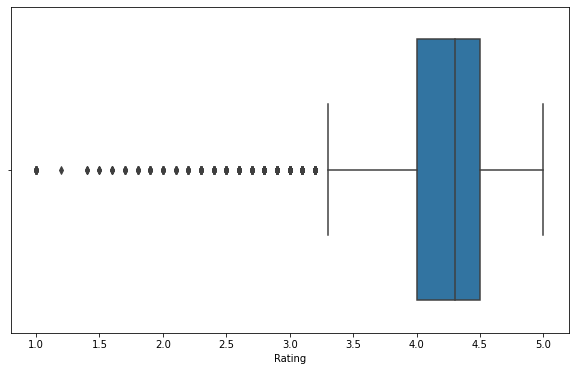

In [ ]:
plt.figure(figsize = (10,6))
sbn.boxplot(app_data_1['Rating'])
plt.show()

In [ ]:
app_data_1.describe()

,Rating,Reviews,Installs(+),Price
count,8318.000000,9.783000e+03,9.783000e+03,9783.000000
mean,4.175367,2.443731e+05,8.564546e+06,1.086386
std,0.534495,1.943086e+06,5.743786e+07,16.745543
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.600000e+01,1.000000e+03,0.000000
50%,4.300000,1.042000e+03,1.000000e+05,0.000000
75%,4.500000,3.161750e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


### Now we will do some EDA on first dataframe

Q1) How many apps are in this dataset?

In [ ]:
len(app_data_1['App'].unique())

9660

Q2) How many app categories are there?

In [ ]:
len(app_data_1['Category'].unique())

34

Q3) How many apps are there in each category?

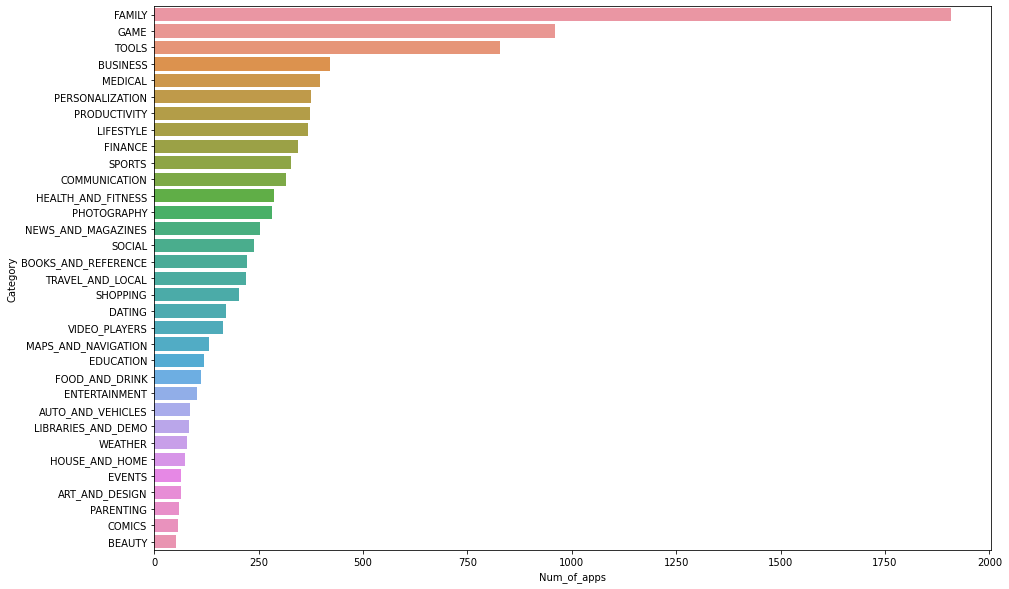

In [ ]:
app_cat = app_data_1[['App','Category']]
app_cat = app_cat[~app_cat.duplicated()]
grouped = app_cat.groupby('Category').size().reset_index().rename(columns = {0:'Num_of_apps'}).sort_values('Num_of_apps', ascending = False)
grouped = grouped.reset_index().drop(['index'], axis = 1)
plt.figure(figsize = (15,10))
sbn.barplot(x = grouped['Num_of_apps'], y = grouped['Category'])
plt.show()

In [ ]:
grouped[0:5]

,Category,Num_of_apps
0,FAMILY,1909
1,GAME,960
2,TOOLS,829
3,BUSINESS,420
4,MEDICAL,396


In [ ]:
print(f"Percentage of Family category apps : {grouped[grouped['Category'] == 'FAMILY']}")

Percentage of Family category apps :   Category  Num_of_apps
0   FAMILY         1909


How many apps are rated?

In [ ]:
print(f"Percentage of rated apps : {round((app_data_1[~app_data_1['Rating'].isnull()]['Rating'].count()/app_data_1.shape[0])*100,2)}%")

Percentage of rated apps : 85.03%


Apps with highest and lowest ratings?

In [ ]:
app_data_1.sort_values(['Rating','Reviews'], ascending = [False,False]).head(10)

,App,Category,Rating,Reviews,Size(in Mb),Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10357,Ríos de Fe,LIFESTYLE,5.0,141.0,15,1000.0,Free,0.0,Everyone,Lifestyle,2018-03-24,1.8,4.1 and up
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104.0,2.3,1000.0,Free,0.0,Everyone,Finance,2018-08-07,2.1.0,4.1 and up
8058,Oración CX,LIFESTYLE,5.0,103.0,3.8,5000.0,Free,0.0,Everyone,Lifestyle,2017-09-12,5.1.10,4.1 and up
6823,Barisal University App-BU Face,FAMILY,5.0,100.0,10,1000.0,Free,0.0,Everyone,Education,2018-05-06,3.1.1,4.0.3 and up
9496,Master E.K,FAMILY,5.0,90.0,Varies with device,1000.0,Free,0.0,Everyone,Education,2017-08-11,1.5.0,4.4 and up
7506,CL REPL,TOOLS,5.0,47.0,17,1000.0,Free,0.0,Everyone,Tools,2018-04-10,1.0.19,4.1 and up
5230,AJ Cam,PHOTOGRAPHY,5.0,44.0,2.8,100.0,Free,0.0,Everyone,Photography,2018-01-23,1.0,4.1 and up
5196,AI Today : Artificial Intelligence News & AI 101,NEWS_AND_MAGAZINES,5.0,43.0,2.3,100.0,Free,0.0,Everyone,News & Magazines,2018-06-22,1.0,4.4 and up
9517,Ek Vote,PRODUCTIVITY,5.0,43.0,6.2,500.0,Free,0.0,Everyone,Productivity,2017-11-07,1.1,4.0.3 and up
7842,CS & IT Interview Questions,FAMILY,5.0,43.0,3.3,1000.0,Free,0.0,Everyone,Education,2018-03-27,1.1,4.2 and up


In [ ]:
app_data_1.sort_values(['Rating','Reviews'], ascending = [True,False]).head(10)

,App,Category,Rating,Reviews,Size(in Mb),Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7427,CJ DVD Rentals,COMMUNICATION,1.0,5.0,13,100.0,Free,0.00,Everyone,Communication,2017-10-06,1.0,4.1 and up
7144,CB Mobile Biz,FINANCE,1.0,3.0,8.4,500.0,Free,0.00,Everyone,Finance,2016-02-22,4.4.1255,4.0 and up
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3.0,41,500.0,Free,0.00,Everyone,Tools,2017-12-12,1.0,4.2 and up
8820,DS Creator 2.0,TOOLS,1.0,2.0,4.4,500.0,Free,0.00,Everyone,Tools,2018-03-23,2.0.180226.1,4.0 and up
7926,Tech CU Card Manager,FINANCE,1.0,2.0,7.2,1000.0,Free,0.00,Everyone,Finance,2017-07-25,1.0.1,4.0 and up
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2.0,21,1000.0,Free,0.00,Everyone,Education,2018-07-27,5.33.3669,5.0 and up
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2.0,33,100.0,Free,0.00,Everyone,Medical,2018-07-02,2.0.1,4.1 and up
5151,Clarksburg AH,MEDICAL,1.0,1.0,28,50.0,Free,0.00,Everyone,Medical,2017-05-01,300000.0.81,4.0.3 and up
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1.0,2,50.0,Paid,1.49,Everyone,Education,2012-04-09,1.0,2.1 and up
7383,Thistletown CI,PRODUCTIVITY,1.0,1.0,6.6,100.0,Free,0.00,Everyone,Productivity,2018-03-15,41.9,4.1 and up


Most reviewed apps?

In [ ]:
app_data_1.sort_values(['Reviews'], ascending = False).head(20)

,App,Category,Rating,Reviews,Size(in Mb),Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888.0,98,1.000000e+08,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
3986,Clash of Clans,FAMILY,4.6,44881447.0,98,1.000000e+08,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526.0,Varies with device,5.000000e+08,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
1872,Subway Surfers,GAME,4.5,27725352.0,76,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,Varies with device,1.000000e+09,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999.0,Varies with device,5.000000e+08,Free,0.0,Everyone,Tools,2018-08-04,4.6.6,Varies with device


Most installed apps?

In [ ]:
app_data_1.sort_values(['Installs(+)'], ascending = False).head(20)

,App,Category,Rating,Reviews,Size(in Mb),Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,Varies with device,1.000000e+09,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
451,Gmail,COMMUNICATION,4.3,4604483.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,Varies with device,1.000000e+09,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362.0,Varies with device,1.000000e+09,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373.0,Varies with device,1.000000e+09,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065.0,13,1.000000e+09,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up
2554,Google+,SOCIAL,4.2,4831125.0,Varies with device,1.000000e+09,Free,0.0,Teen,Social,2018-07-26,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device


Least installed apps?

In [ ]:
app_data_1.sort_values(['Installs(+)']).head(10)

,App,Category,Rating,Reviews,Size(in Mb),Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9917,Eu Sou Rico,FINANCE,NaN,0.0,1.4,0.0,Paid,394.99,Everyone,Finance,2018-07-11,1.0,4.0.3 and up
7434,Pekalongan CJ,SOCIAL,NaN,0.0,5.9,0.0,Free,0.00,Teen,Social,2018-07-21,0.0.1,4.4 and up
5486,AP Series Solution Pro,FAMILY,NaN,0.0,7.4,0.0,Paid,1.99,Everyone,Education,2017-07-30,1.3,4.0 and up
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,Varies with device,0.0,NaN,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0.0,56,0.0,Paid,3.99,Everyone,Travel & Local,2017-01-22,1.1.1,4.1 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0.0,2.1,0.0,Free,0.00,Everyone,News & Magazines,2018-07-07,1.1,4.4 and up
9905,Eu sou Rico,FINANCE,NaN,0.0,2.6,0.0,Paid,30.99,Everyone,Finance,2018-01-09,1.0,4.0 and up
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0.0,5.5,0.0,Paid,1.49,Everyone,Personalization,2018-07-11,1.1,4.2 and up
9719,EP Cook Book,MEDICAL,NaN,0.0,3.2,0.0,Paid,200.00,Everyone,Medical,2015-07-26,1.0,3.0 and up
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0.0,8.7,0.0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up


Rating Distribution

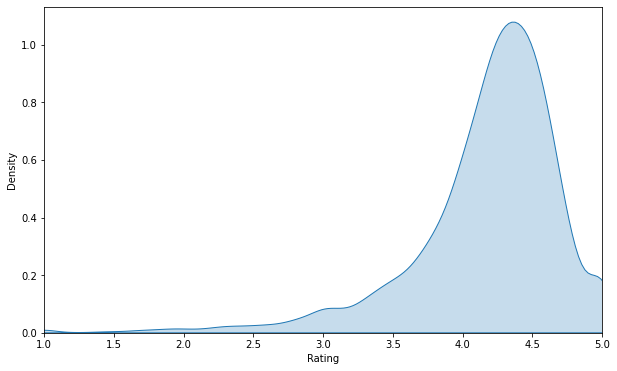

In [ ]:
plt.figure(figsize = (10,6))
fig = sbn.kdeplot(app_data_1['Rating'], shade  = True)
fig = plt.axis(xmin = 1, xmax = 5)
plt.show()

Types of content rating?

In [ ]:
list(app_data_1['Content Rating'].unique())

['Everyone',
 'Teen',
 'Everyone 10+',
 'Mature 17+',
 'Unrated',
 'Adults only 18+']

Num of apps in each Content Rating group

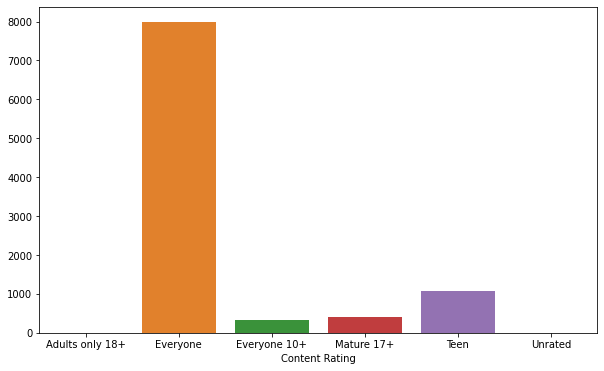

In [ ]:
grpdby_rate_grp1 = app_data_1.groupby('Content Rating')
grpdby_rate_grp = grpdby_rate_grp1.size()
plt.figure(figsize = (10,6))
sbn.barplot(x = grpdby_rate_grp.index, y = grpdby_rate_grp.values)
plt.show()

In [ ]:
grpdby_rate_grp

Content Rating
Adults only 18+       3
Everyone           7983
Everyone 10+        336
Mature 17+          396
Teen               1063
Unrated               2
dtype: int64

### Plot 1) Num of apps in different types?(Free / Paid/ Others)


In [ ]:
grouped_by_cost = app_data_1.groupby('Type').size()
grouped_by_cost

Type
Free    9024
Paid     758
dtype: int64

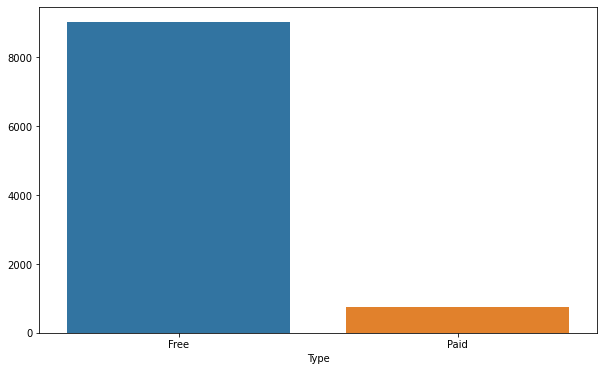

In [ ]:
plt.figure(figsize = (10,6))
sbn.barplot(x = grouped_by_cost.index, y = grouped_by_cost.values)
plt.show()

Most costly app?

In [ ]:
app_data_1.sort_values(['Price'], ascending = False).iloc[0:10,[0,7]]

,App,Price
4367,I'm Rich - Trump Edition,400.00
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99
5354,I am Rich Plus,399.99
5358,I am Rich!,399.99
5359,I am rich(premium),399.99
5362,I Am Rich Pro,399.99
4197,most expensive app (H),399.99
5351,I am rich,399.99
5356,I Am Rich Premium,399.99
5373,I AM RICH PRO PLUS,399.99


How many genres?

In [ ]:
len(app_data_1['Genres'].unique())

120

Q) Newly updated apps and oldest updated apps?

In [ ]:
app_data_1.sort_values('Last Updated', ascending = False)[:5]

,App,Category,Rating,Reviews,Size(in Mb),Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10712,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392.0,Varies with device,1000000.0,Free,0.00,Everyone,Shopping,2018-08-08,Varies with device,Varies with device
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434.0,3.6,50000.0,Free,0.00,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2.4,1000.0,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up
10718,BankNordik,FINANCE,3.9,28.0,15,5000.0,Free,0.00,Everyone,Finance,2018-08-08,7.3.2,5.0 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334.0,27,50000000.0,Free,0.00,Teen,Action,2018-08-08,1.1.2,4.1 and up


In [ ]:
app_data_1.sort_values('Last Updated')[:5]

,App,Category,Rating,Reviews,Size(in Mb),Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7479,FML F*ck my life + widget,FAMILY,4.2,1415.0,0.2,100000.0,Free,0.0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up
7430,CJ Poker Odds Calculator,GAME,4.1,207.0,0.11,50000.0,Free,0.0,Everyone,Card,2011-01-30,1.2,1.6 and up
10282,FD Shift Calendar Widget,TOOLS,4.1,981.0,0.07,100000.0,Free,0.0,Everyone,Tools,2011-03-16,1.2.4,1.6 and up
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767.0,4.1,5000000.0,Free,0.0,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up
8084,Freecell CY,GAME,4.0,387.0,1.1,50000.0,Free,0.0,Everyone,Card,2011-04-16,1.3.3,1.6 and up


# Bivariate Analysis

Any correlation between Rating, review?

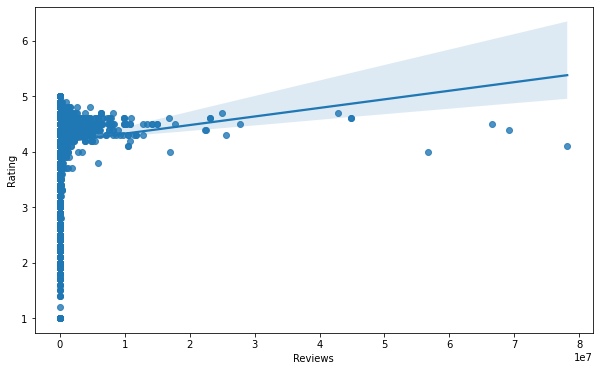

In [ ]:
plt.figure(figsize = (10,6))
sbn.regplot(x = app_data_1['Reviews'],y = app_data_1['Rating'])
plt.show()

Any correlation between min. installs, review?

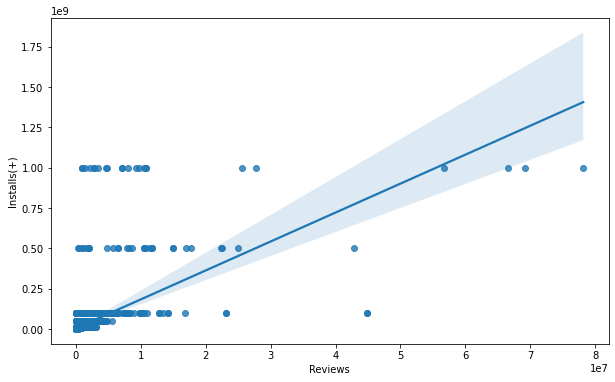

In [ ]:
plt.figure(figsize = (10,6))
sbn.regplot(x = app_data_1['Reviews'],y = app_data_1['Installs(+)'])
plt.show()

Correlation between min. installs and ratings?

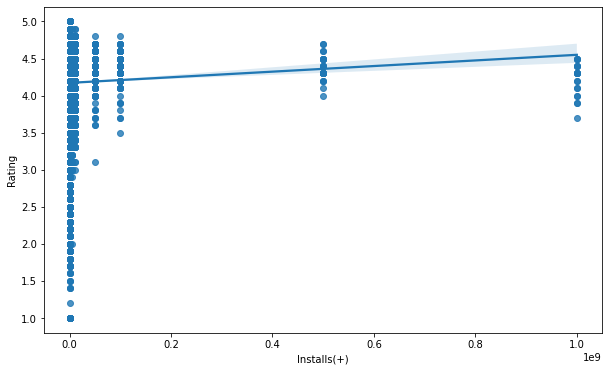

In [ ]:
plt.figure(figsize = (10,6))
sbn.regplot(x = app_data_1['Installs(+)'],y = app_data_1['Rating'])
plt.show()

Average rating category wise?

In [ ]:
grouped_category = app_data_1.groupby('Category')
ranked_category = grouped_category['Rating'].mean().sort_values(ascending = False)
top_5_category = ranked_category[0:5]
last_5_category = ranked_category[-5:]

top_5 = pd.DataFrame(top_5_category).reset_index().rename(columns = {'Rating' : 'Avg. Rating'})
last_5 = pd.DataFrame(last_5_category).reset_index().rename( columns = {'Rating': 'Avg. Rating'})
print(top_5)
print('\n')
print( last_5)



              Category  Avg. Rating
0               EVENTS     4.435556
1            EDUCATION     4.364407
2       ART_AND_DESIGN     4.357377
3  BOOKS_AND_REFERENCE     4.344970
4      PERSONALIZATION     4.332215


              Category  Avg. Rating
0     TRAVEL_AND_LOCAL     4.069519
1        VIDEO_PLAYERS     4.046358
2                TOOLS     4.041413
3  MAPS_AND_NAVIGATION     4.039167
4               DATING     3.971852


## <u> Plotting data about user reviews dataframe </u>

First of all we will see any null values in user reviews dataframe

In [ ]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


We can see there are some null values in all four columns of apps, so we will remove them

In [ ]:
user_reviews[user_reviews['Sentiment_Polarity'].isnull()].isnull().sum()

App                         0
Translated_Review         982
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [ ]:
## Dropping the above found 982 rows

user_reviews = user_reviews[~user_reviews['Sentiment_Polarity'].isnull()]
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29697 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29697 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


## Ques 0) Total num of apps reviewed?

In [ ]:
len(user_reviews['App'].unique())

865

## Ques 1) Top 100 most reviewed apps?

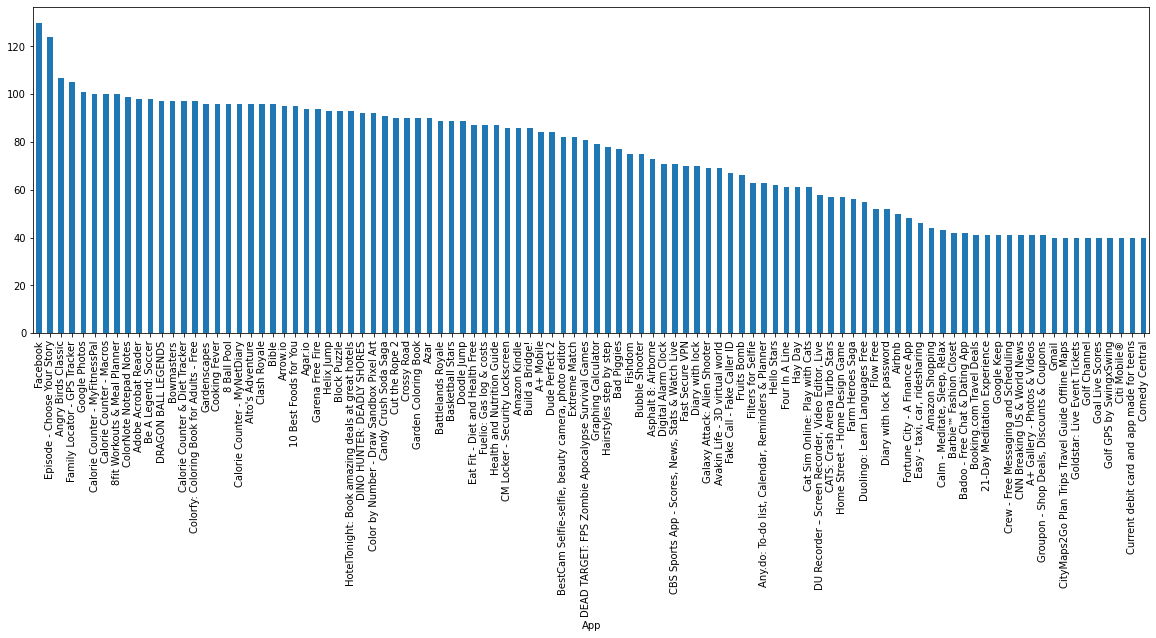

In [ ]:
review_num = user_reviews.groupby('App').size()
top_100_reviewed = review_num.sort_values(ascending = False)[0:100]
plt.figure(figsize = (20,6))
top_100_reviewed.plot(kind = 'bar')
plt.show()


In [ ]:
review_num.describe()

count    865.000000
mean      34.331792
std       19.889154
min        1.000000
25%       27.000000
50%       35.000000
75%       39.000000
max      130.000000
dtype: float64

## Ques 2) How many reviews are positive, negative, or neutral?

In [ ]:
user_reviews['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

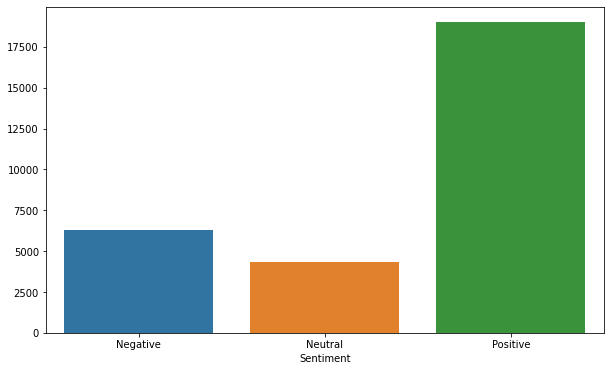

In [ ]:
sentiment_num = user_reviews.groupby('Sentiment').size()
plt.figure(figsize = (10,6))
sbn.barplot(x = sentiment_num.index, y = sentiment_num.values)
plt.show()

In [ ]:
sentiment_num

Sentiment
Negative     6321
Neutral      4361
Positive    19015
dtype: int64

Distribution of Sentiment Polarity

In [ ]:
user_reviews['Sentiment_Polarity'].describe()

count    29697.000000
mean         0.188836
std          0.355672
min         -1.000000
25%          0.000000
50%          0.157143
75%          0.422500
max          1.000000
Name: Sentiment_Polarity, dtype: float64

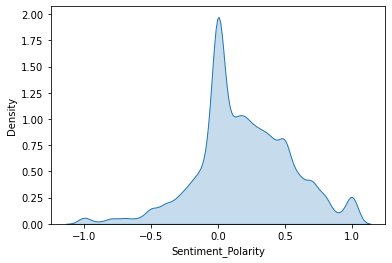

In [ ]:
sbn.kdeplot(user_reviews['Sentiment_Polarity'], shade = True)
plt.show()

## Ques 3) Plot the distribution of Sentiment subjectivity?

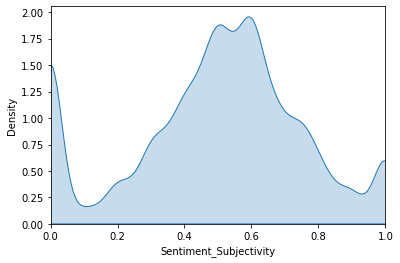

In [ ]:
fig = sbn.kdeplot(data = user_reviews['Sentiment_Subjectivity'], shade = True)
fig.axis(xmin = 0, xmax = 1)
plt.show()

In [ ]:
user_reviews['Sentiment_Subjectivity'].describe()

count    29697.000000
mean         0.490848
std          0.266029
min          0.000000
25%          0.350000
50%          0.514286
75%          0.652500
max          1.000000
Name: Sentiment_Subjectivity, dtype: float64

## Ques 4) For each top 50 apps how many reviews are +ive, -ive , neutral?

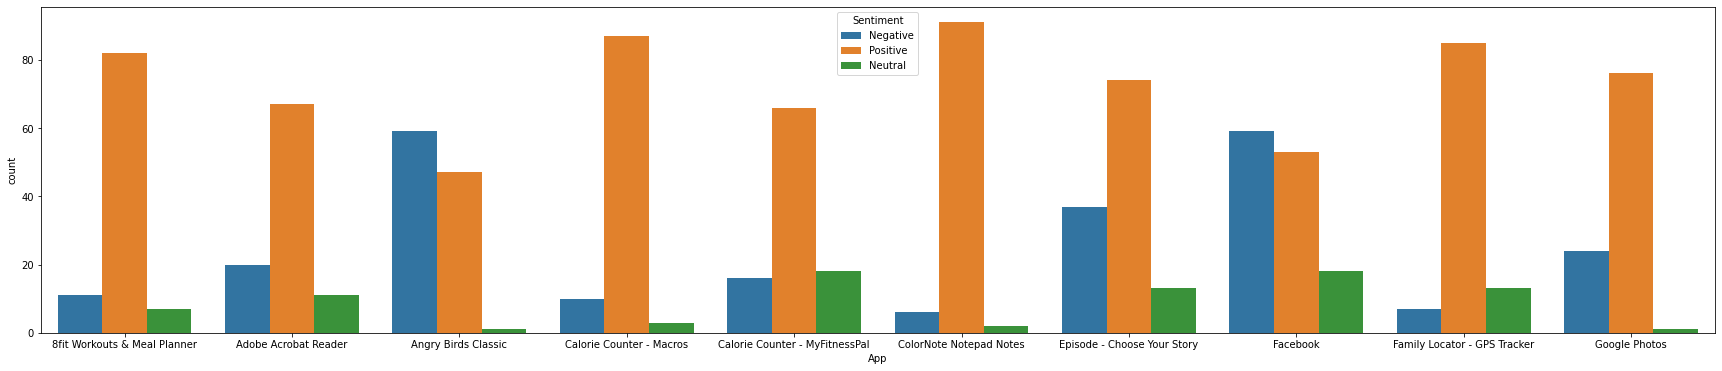

In [ ]:
top_10_reviewed = list(review_num.sort_values(ascending = False)[0:10].index)
top_10 = user_reviews.loc[user_reviews['App'].isin(top_10_reviewed)]
plt.figure(figsize = (30,6))
sbn.countplot(x = top_10['App'], hue = top_10['Sentiment'])
plt.show()

## Ques 6) Top 10 apps having most +ive reviews?

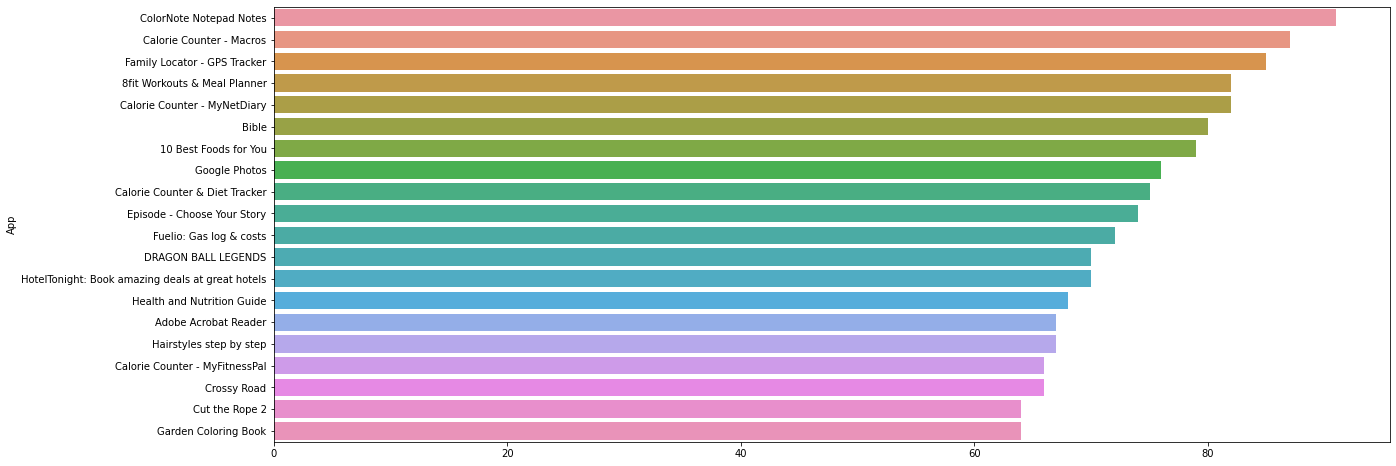

In [ ]:
# First making dataframe of positive sentiment reviews

posv_rev = user_reviews[user_reviews['Sentiment'] == 'Positive']
grouped = posv_rev.groupby(posv_rev['App']).size()
top_10_posv = grouped.sort_values(ascending = False)[0:20]
plt.figure(figsize = (20,8))
sbn.barplot(x = top_10_posv.values, y = top_10_posv.index)
plt.show()

## Ques 7) Top 10 apps having most -ive reviews?

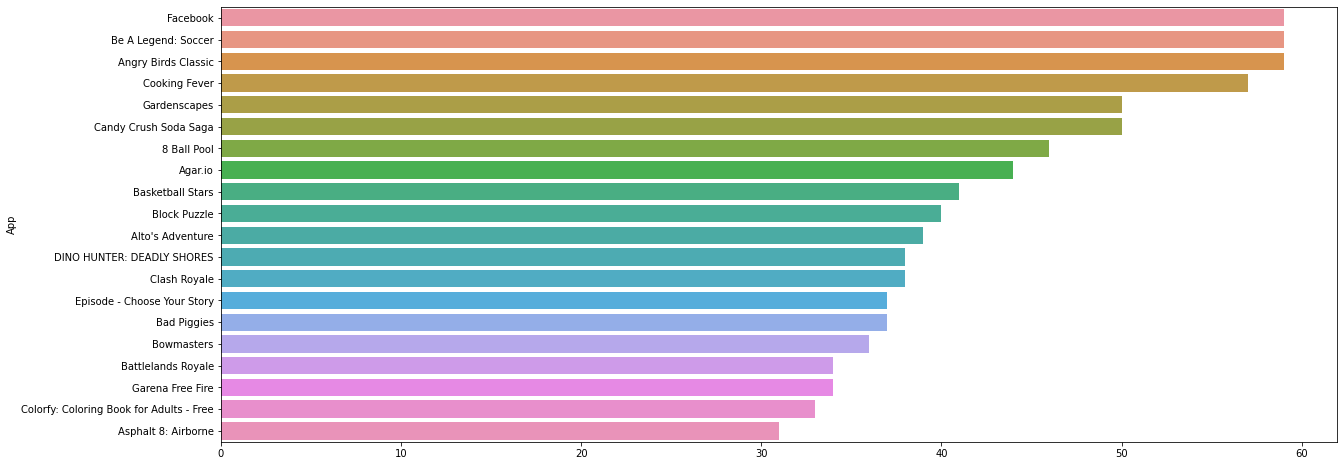

In [ ]:
# First making dataframe of negative sentiment reviews

negv_rev = user_reviews[user_reviews['Sentiment'] == 'Negative']
grouped = negv_rev.groupby(negv_rev['App']).size()
top_10_negv = grouped.sort_values(ascending = False)[0:20]
plt.figure(figsize = (20,8))
sbn.barplot(x = top_10_negv.values, y = top_10_negv.index)
plt.show()

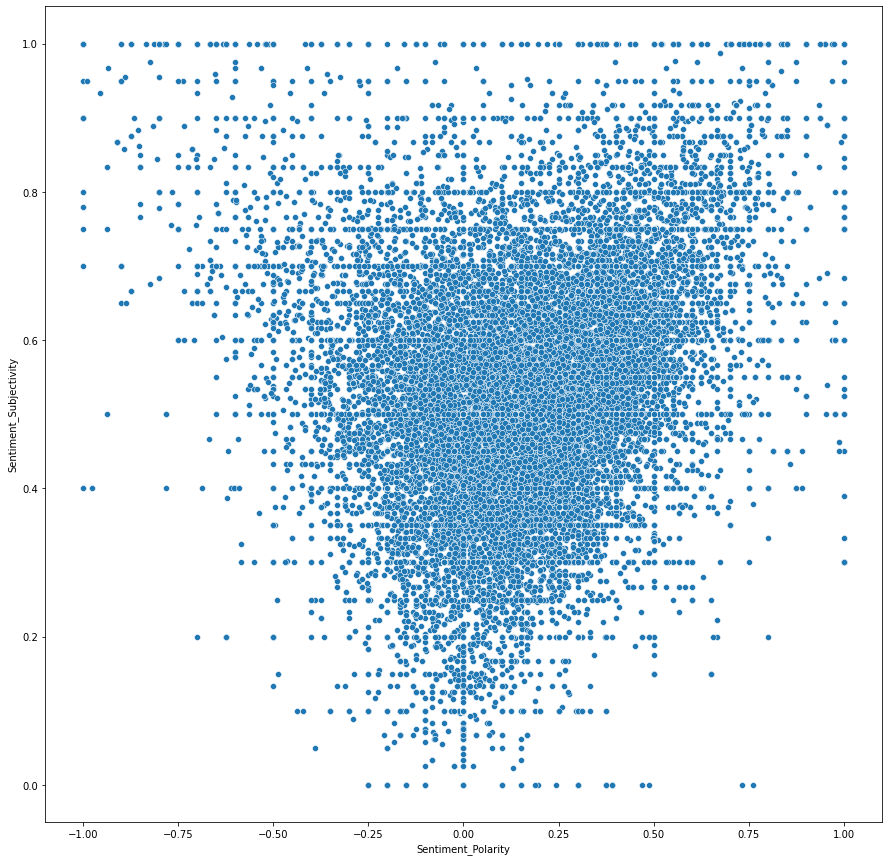

In [ ]:
plt.figure(figsize = (15,15))
sbn.scatterplot(x = user_reviews['Sentiment_Polarity'],y = user_reviews['Sentiment_Subjectivity'])
plt.show()

(1)From this scatter plot we get some insights that as the subjectivity of reviews increases, the polarity of reviews ranges a lot.

(2)Most of negative reviews are subjective in nature.